In [15]:
import sys, os
os.chdir('G:\My Drive\Documents\PhD\Modelling\_RiceBall')

In [16]:
from ricepaper import RicePaper
from ricepaper.reader import RiceBall
from ricepaper.dykes import DykeFarm

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [17]:
R = RicePaper("RicePaperTest")

In [18]:
#setup simulation as per La Palma demo

#material properties
R.setRadius(1,30)
R.setRadius(2,25)
R.setRadius(3,20)

R.setDensity(1,2500)
R.setDensity(2,2500)
R.setDensity(3,2500)

R.setHertzian(1,2.9e9,0.2)
R.setHertzian(2,2.9e9,0.2)
R.setHertzian(3,2.9e9,0.2)

R.setLinItc(1,1,2e10,2e10)
R.setLinItc(1,2,2e10,2e10)
R.setLinItc(1,3,2e10,2e10)
R.setLinItc(2,2,2e10,2e10)
R.setLinItc(2,3,2e10,2e10)
R.setLinItc(3,3,2e10,2e10)

R.setFrictionItc(1,1,0.3)
R.setFrictionItc(1,2,0.3)
R.setFrictionItc(1,3,0.3)
R.setFrictionItc(2,2,0.3)
R.setFrictionItc(2,3,0.3)
R.setFrictionItc(3,3,0.3)

#numerical properties
R.setDamping() #use defaults
R.setNumericalProperties(timestep=5e-2)

#generate line of balls
R.genLine((25, 75, 50),(25, 4975, 50), 2.0, 3, 3) #left side
R.genLine((14975, 75, 50),(14975, 4975, 50), 2.0, 3, 3) #righth side
R.genLine((25, 25, 50),(14975, 25, 50), 2.0, 3, 3) #bottom side
R.fixDOFAll(True,True,True) #fix DOF on balls


R.setGravity((0,-9.8,0)) #set gravity

#generate some balls!
R.setDomain(6000,9000,4000,6000,0,100) #domain to create balls in

#create balls and cycle
for i in range(4):
    R.genBalls(500,1,1)
    R.genBalls(1000,2,1)
    R.cycle(2000)

In [19]:
R.execute(suppress=True)

0

In [20]:
model = R.loadLastOutput()

In [21]:
#shape volcano using cutting lines
deleted = []
deleted = model.cut(4000,30)
deleted += model.cut(11000,-30)

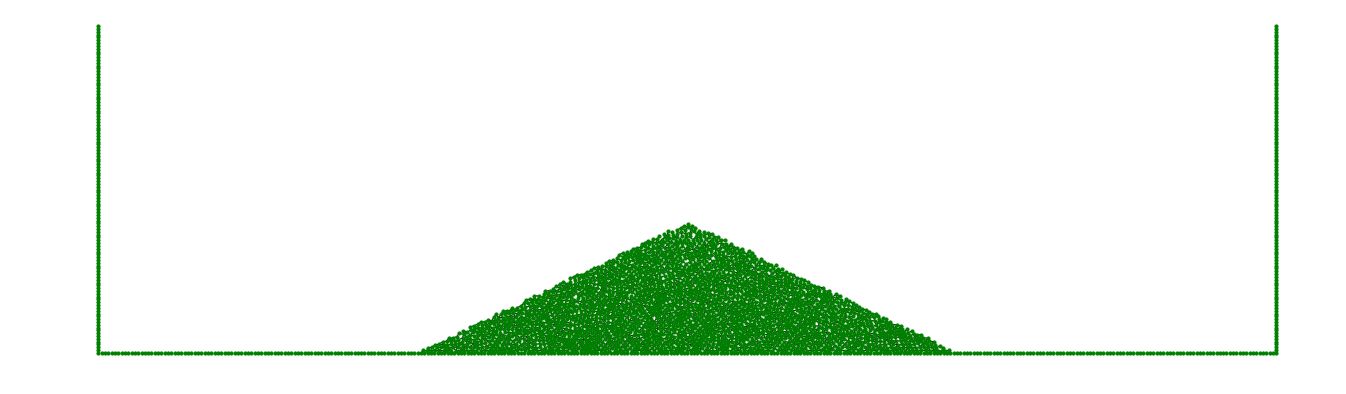

In [22]:
#plot!
plt.figure(figsize=(18,5))
nx.draw(model.G,model.pos,node_size=10,node_color='g')

In [23]:
#delete these nodes
R.delBalls(deleted,model.pos)

In [24]:
#clone this model (to test clone function) - this will restart in a different folder, allowing "branched" model simulations were
#different models are created from a single initial model. 
R2 = R.clone("RicePaperTest_clone")
R2.cycle(5)
R2.execute()

0

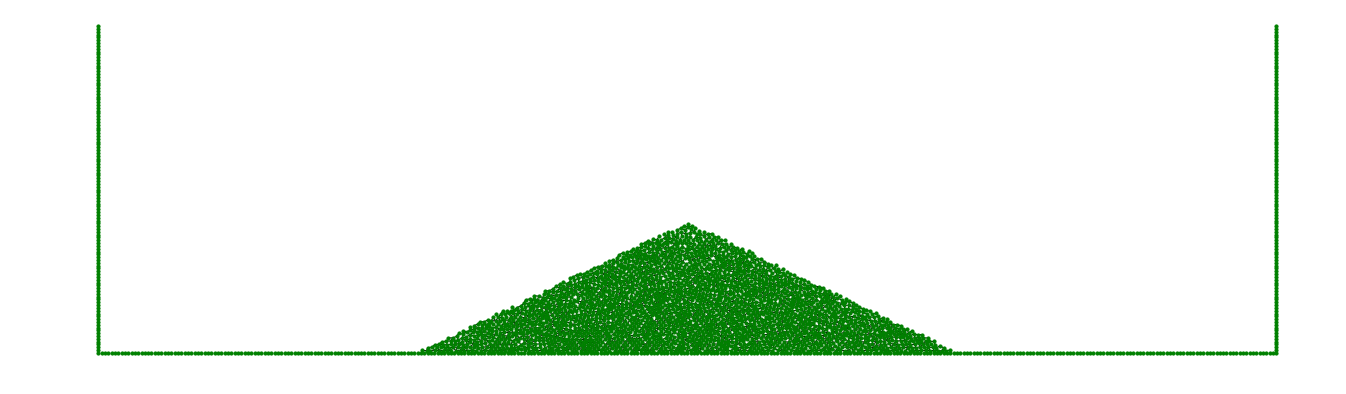

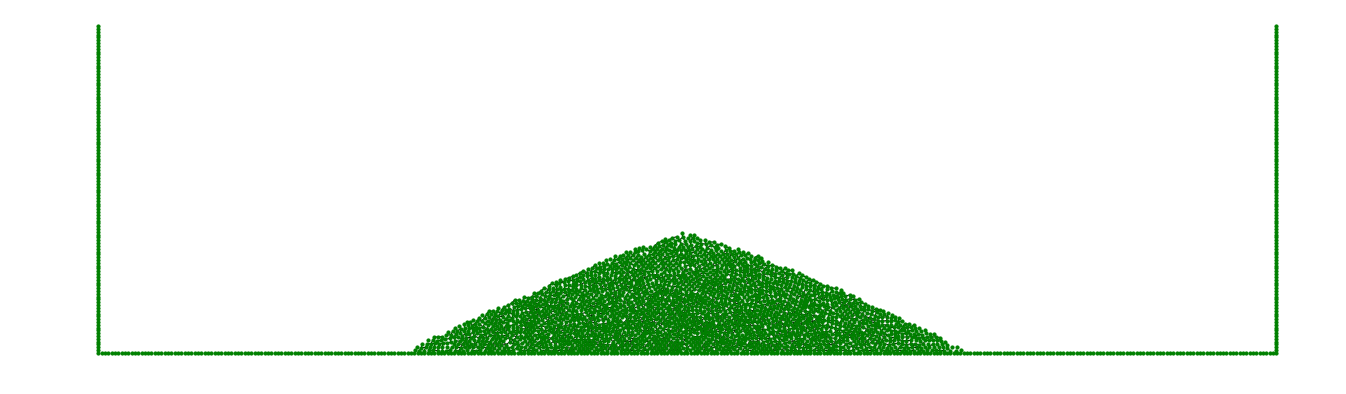

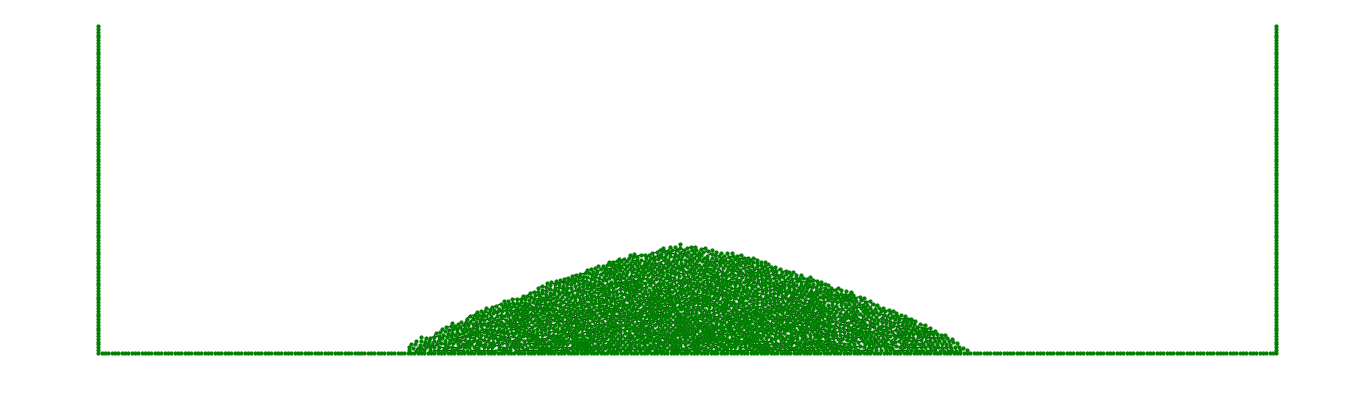

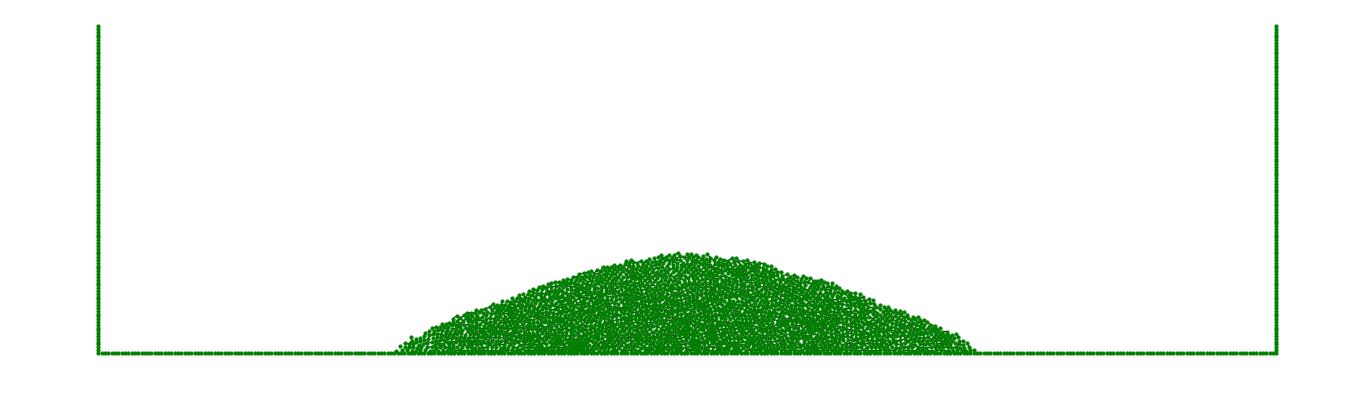

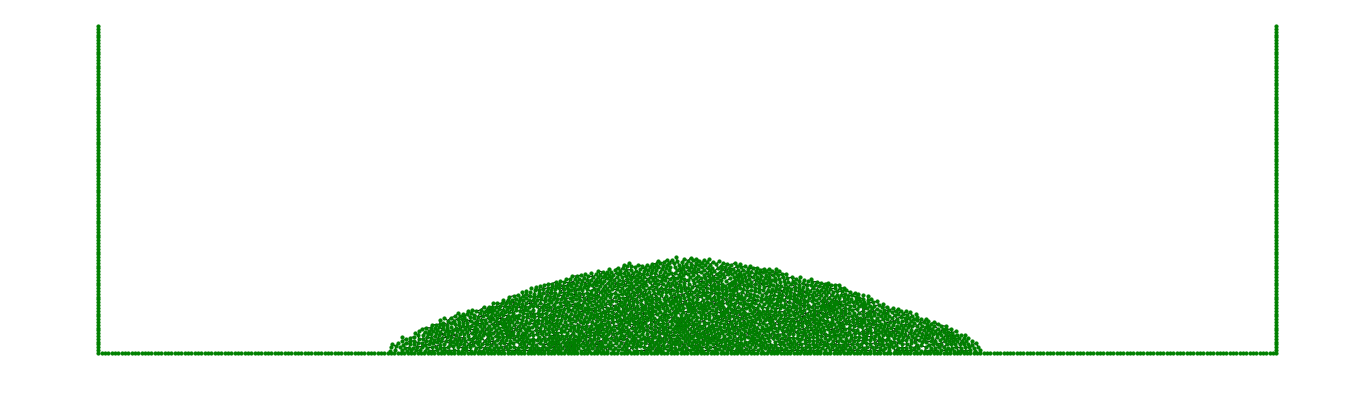

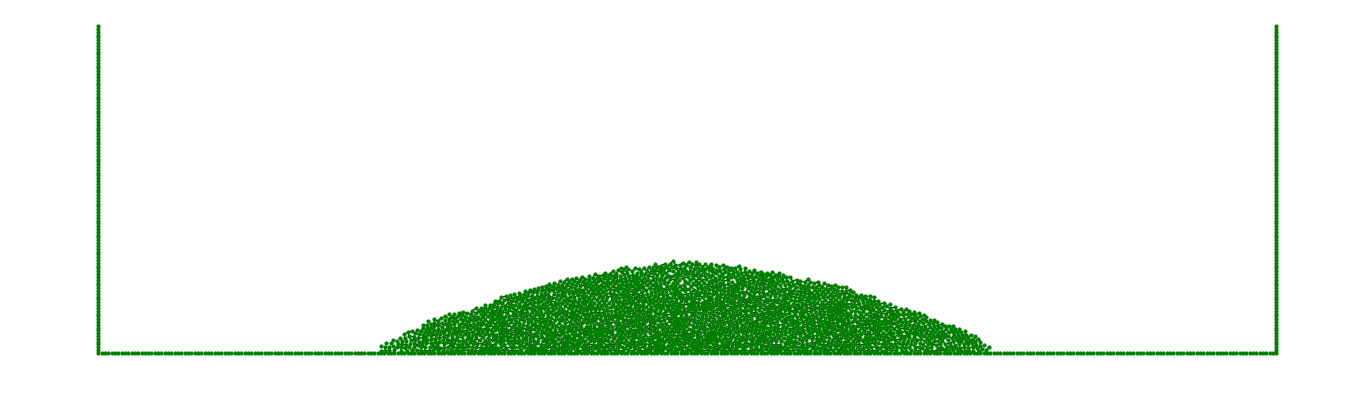

In [25]:
#plot unstable model
model = R2.loadLastOutput()
plt.figure(figsize=(18,5))
nx.draw(model.G,model.pos,node_size=10,node_color='g')

#calculate and plot as model re-stabilises
for i in range(5):
    R2.cycle(200)
    R2.execute()
    #plot this last step
    model = R2.loadLastOutput()
    plt.figure(figsize=(18,5))
    nx.draw(model.G,model.pos,node_size=10,node_color='g')
    plt.show()